In [20]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
import scipy.stats as stats
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml


Populating the interactive namespace from numpy and matplotlib


In [21]:
# Define the path to the dataset
path_to_data = 'https://drive.google.com/uc?id=1hWB66jk3g37_Qq53UHx_lDG2iIQCmNkQ'

# Read the dataset without assuming a header
data = pd.read_csv(path_to_data, delim_whitespace=True, header=None)

# Define column names (ensure they match the dataset)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Assign column names to the DataFrame
data.columns = column_names

# Delete the 'CRIM' column
data = data.drop('B', axis=1)

# Display the entire dataset
# print(data)

<ipython-input-21-85729b19fcdd>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path_to_data, delim_whitespace=True, header=None)


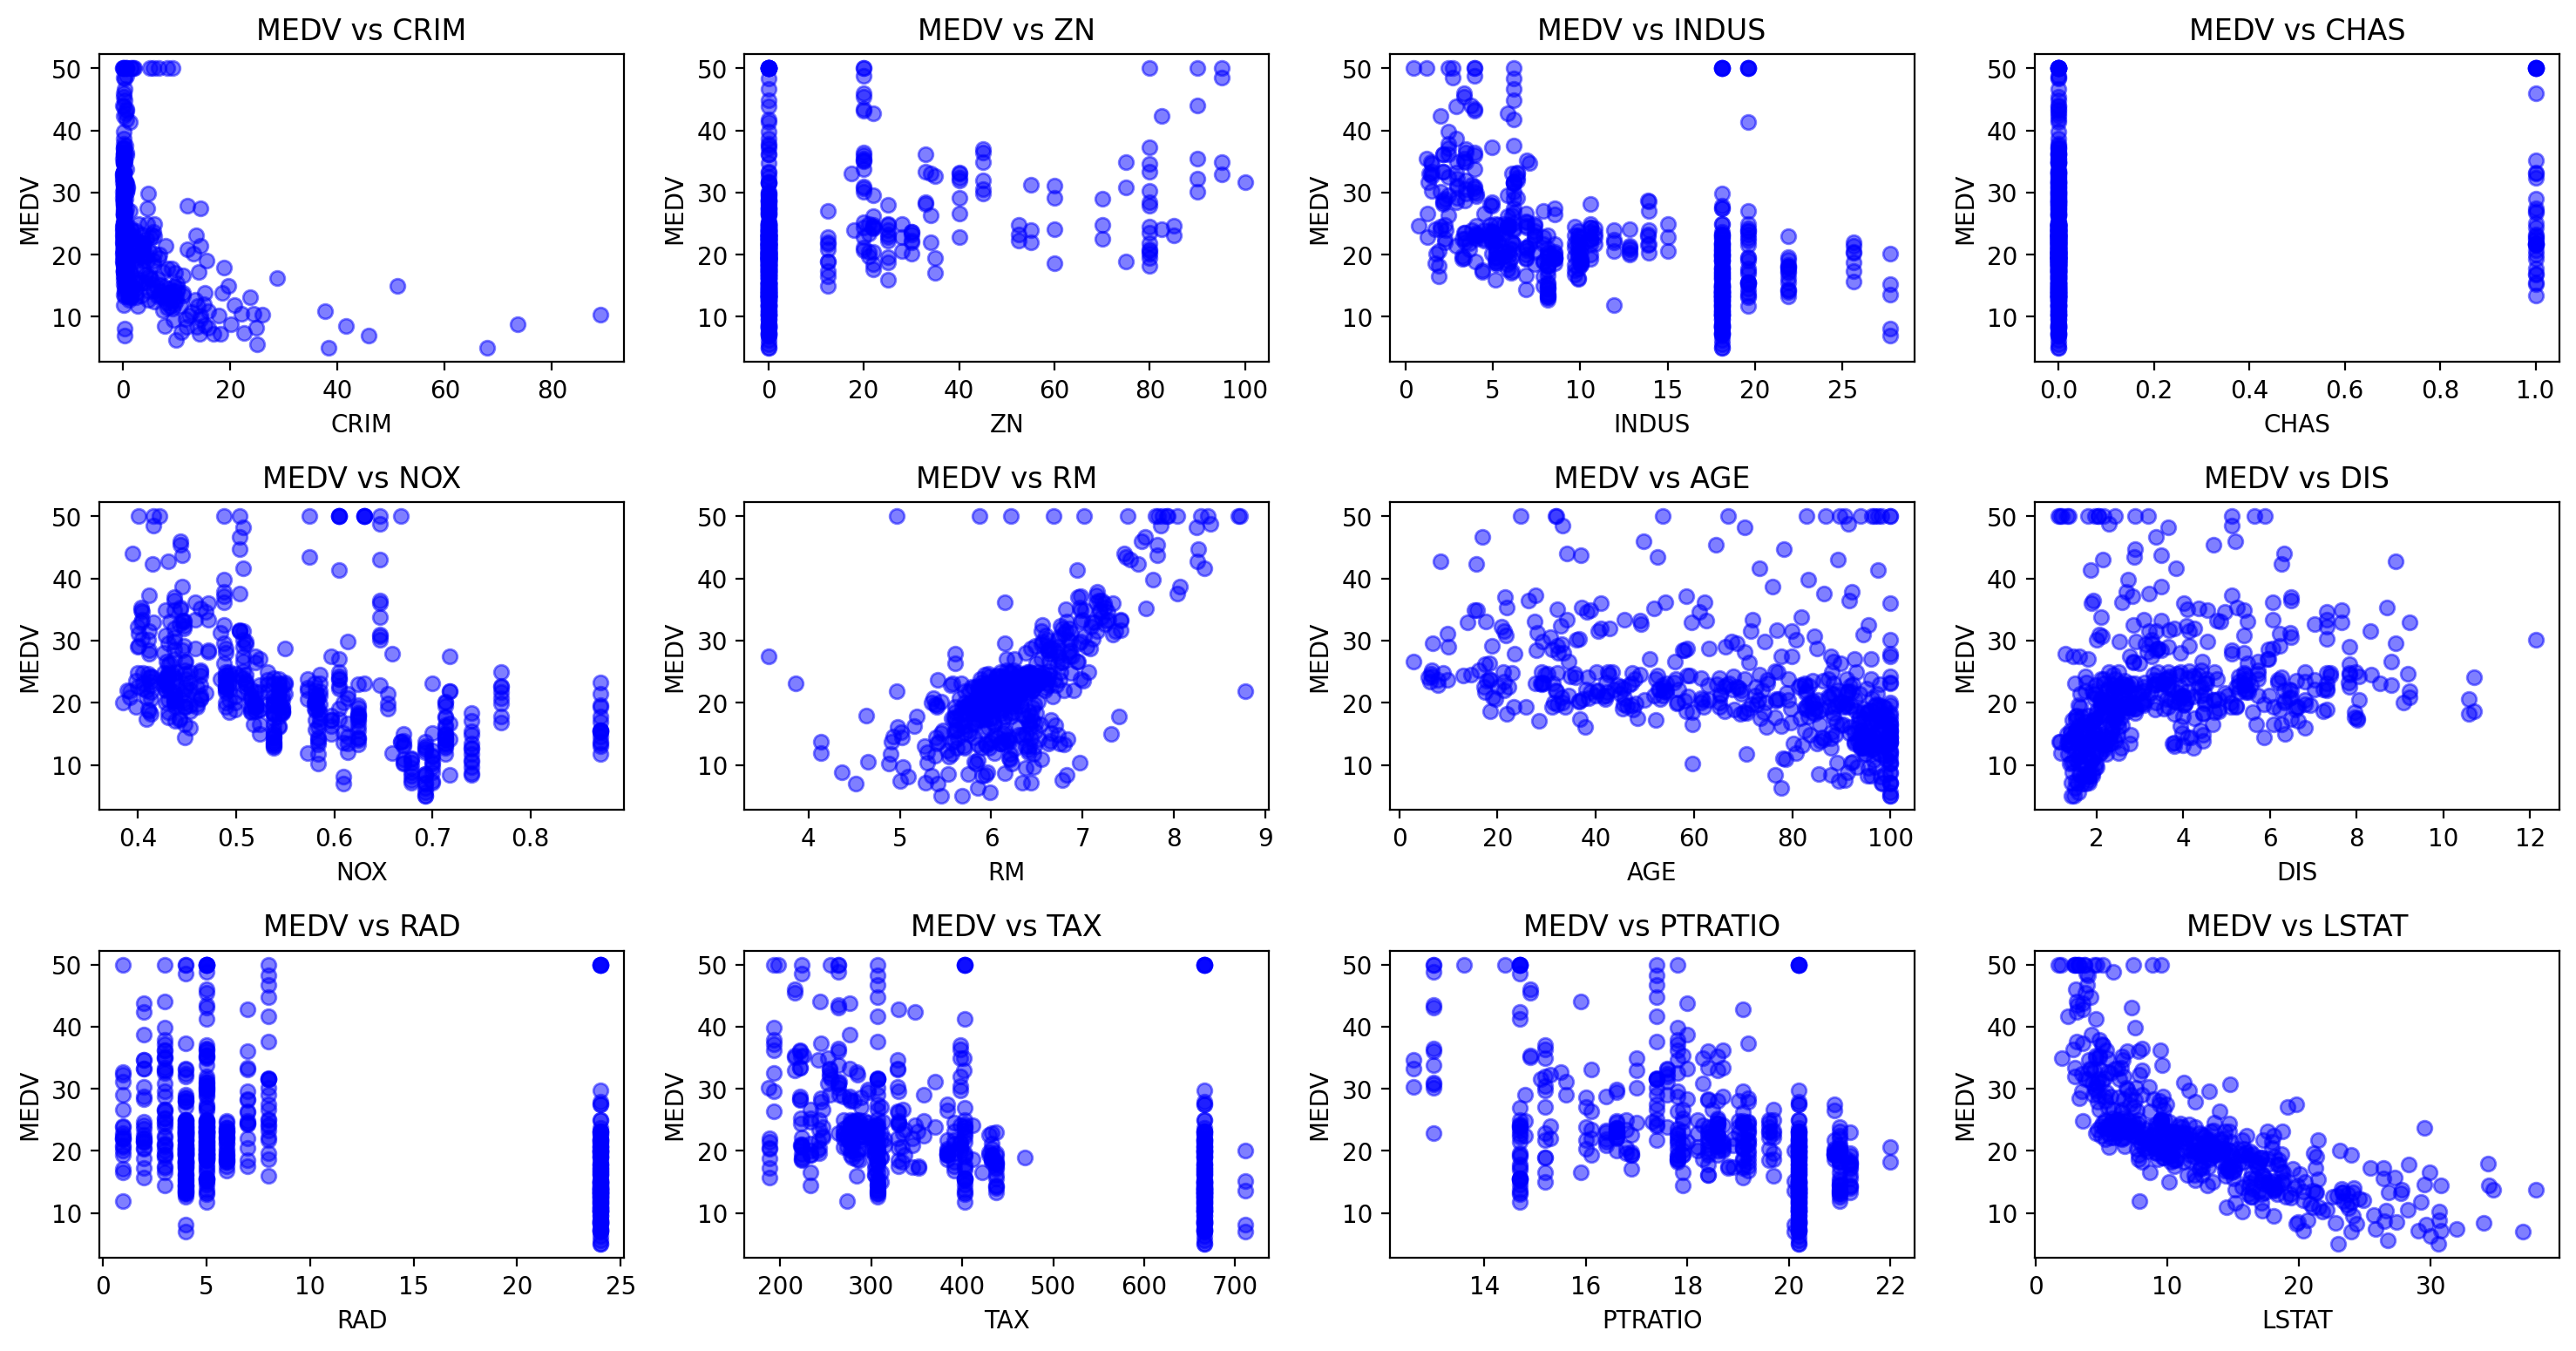

In [22]:
# Creating scatter plots

# Define the response variable (target)
y_response = data['MEDV']

# Create scatter plots for each predictor against the target variable
plt.figure(figsize=(15, 10))  # Set figure size

for i, col in enumerate(data.columns[:-1]):  # Exclude MEDV from predictors
    plt.subplot(4, 4, i + 1)  # Create subplots in a 4x4 grid
    plt.scatter(data[col], y_response, color='blue', alpha=0.5)  # Set blue color
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(f'MEDV vs {col}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


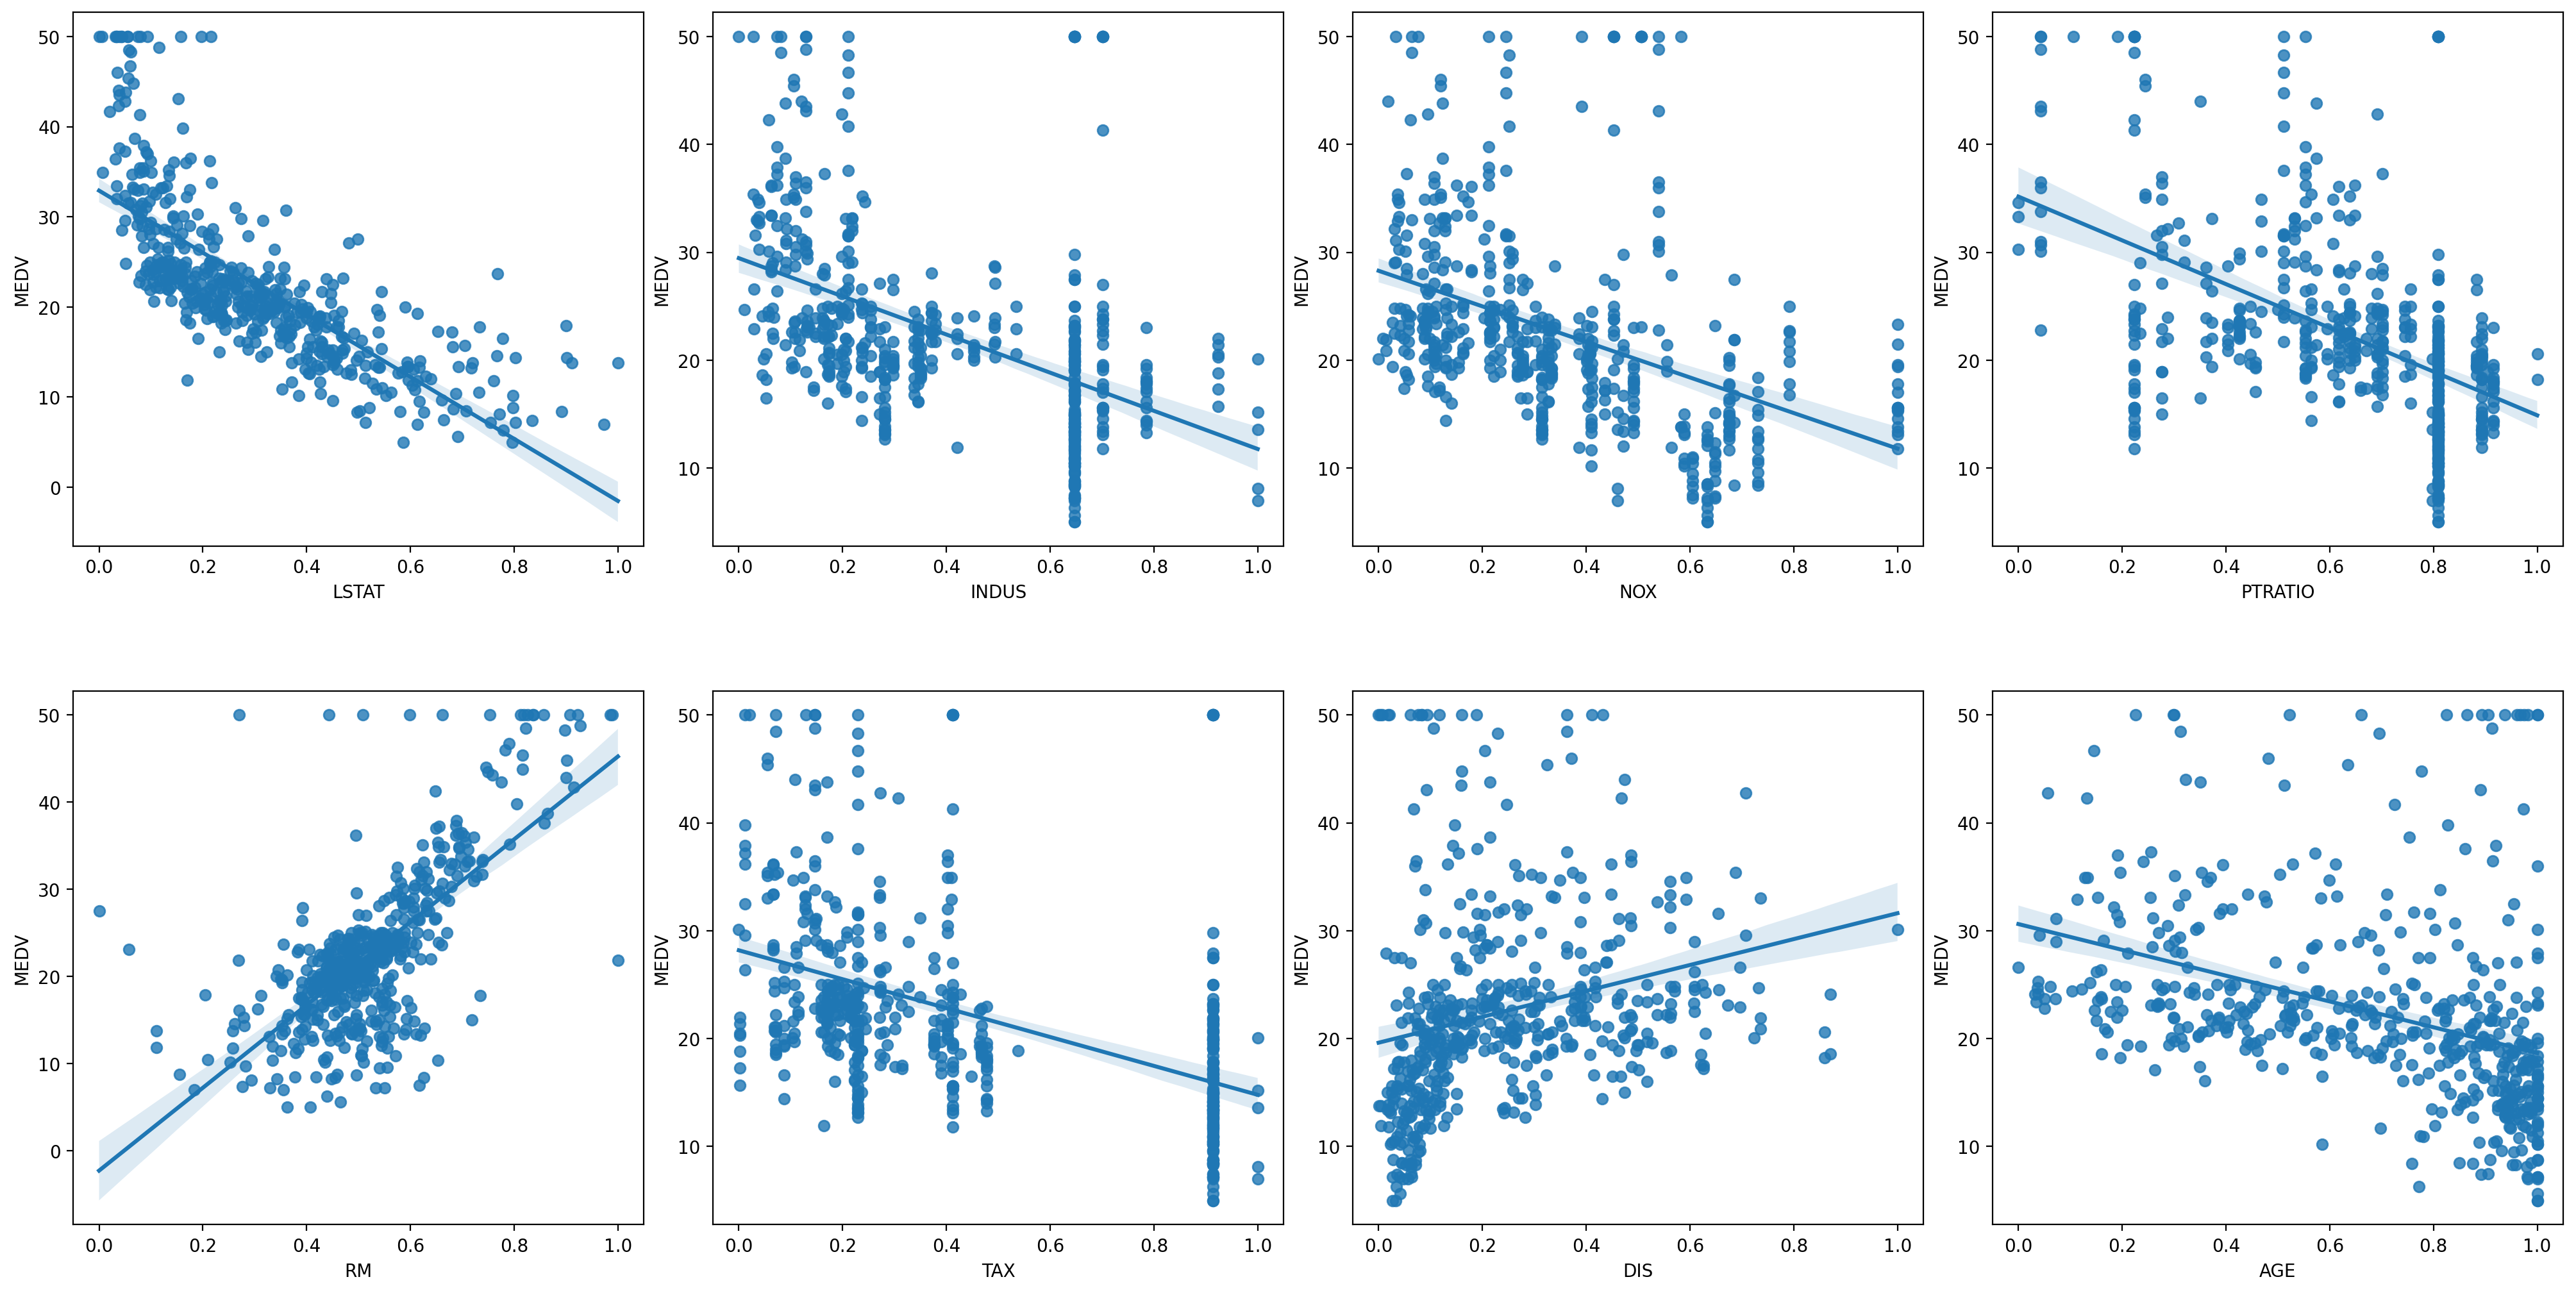

In [23]:
from sklearn import preprocessing
import seaborn as sns # import seaborn here as well.
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [24]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2

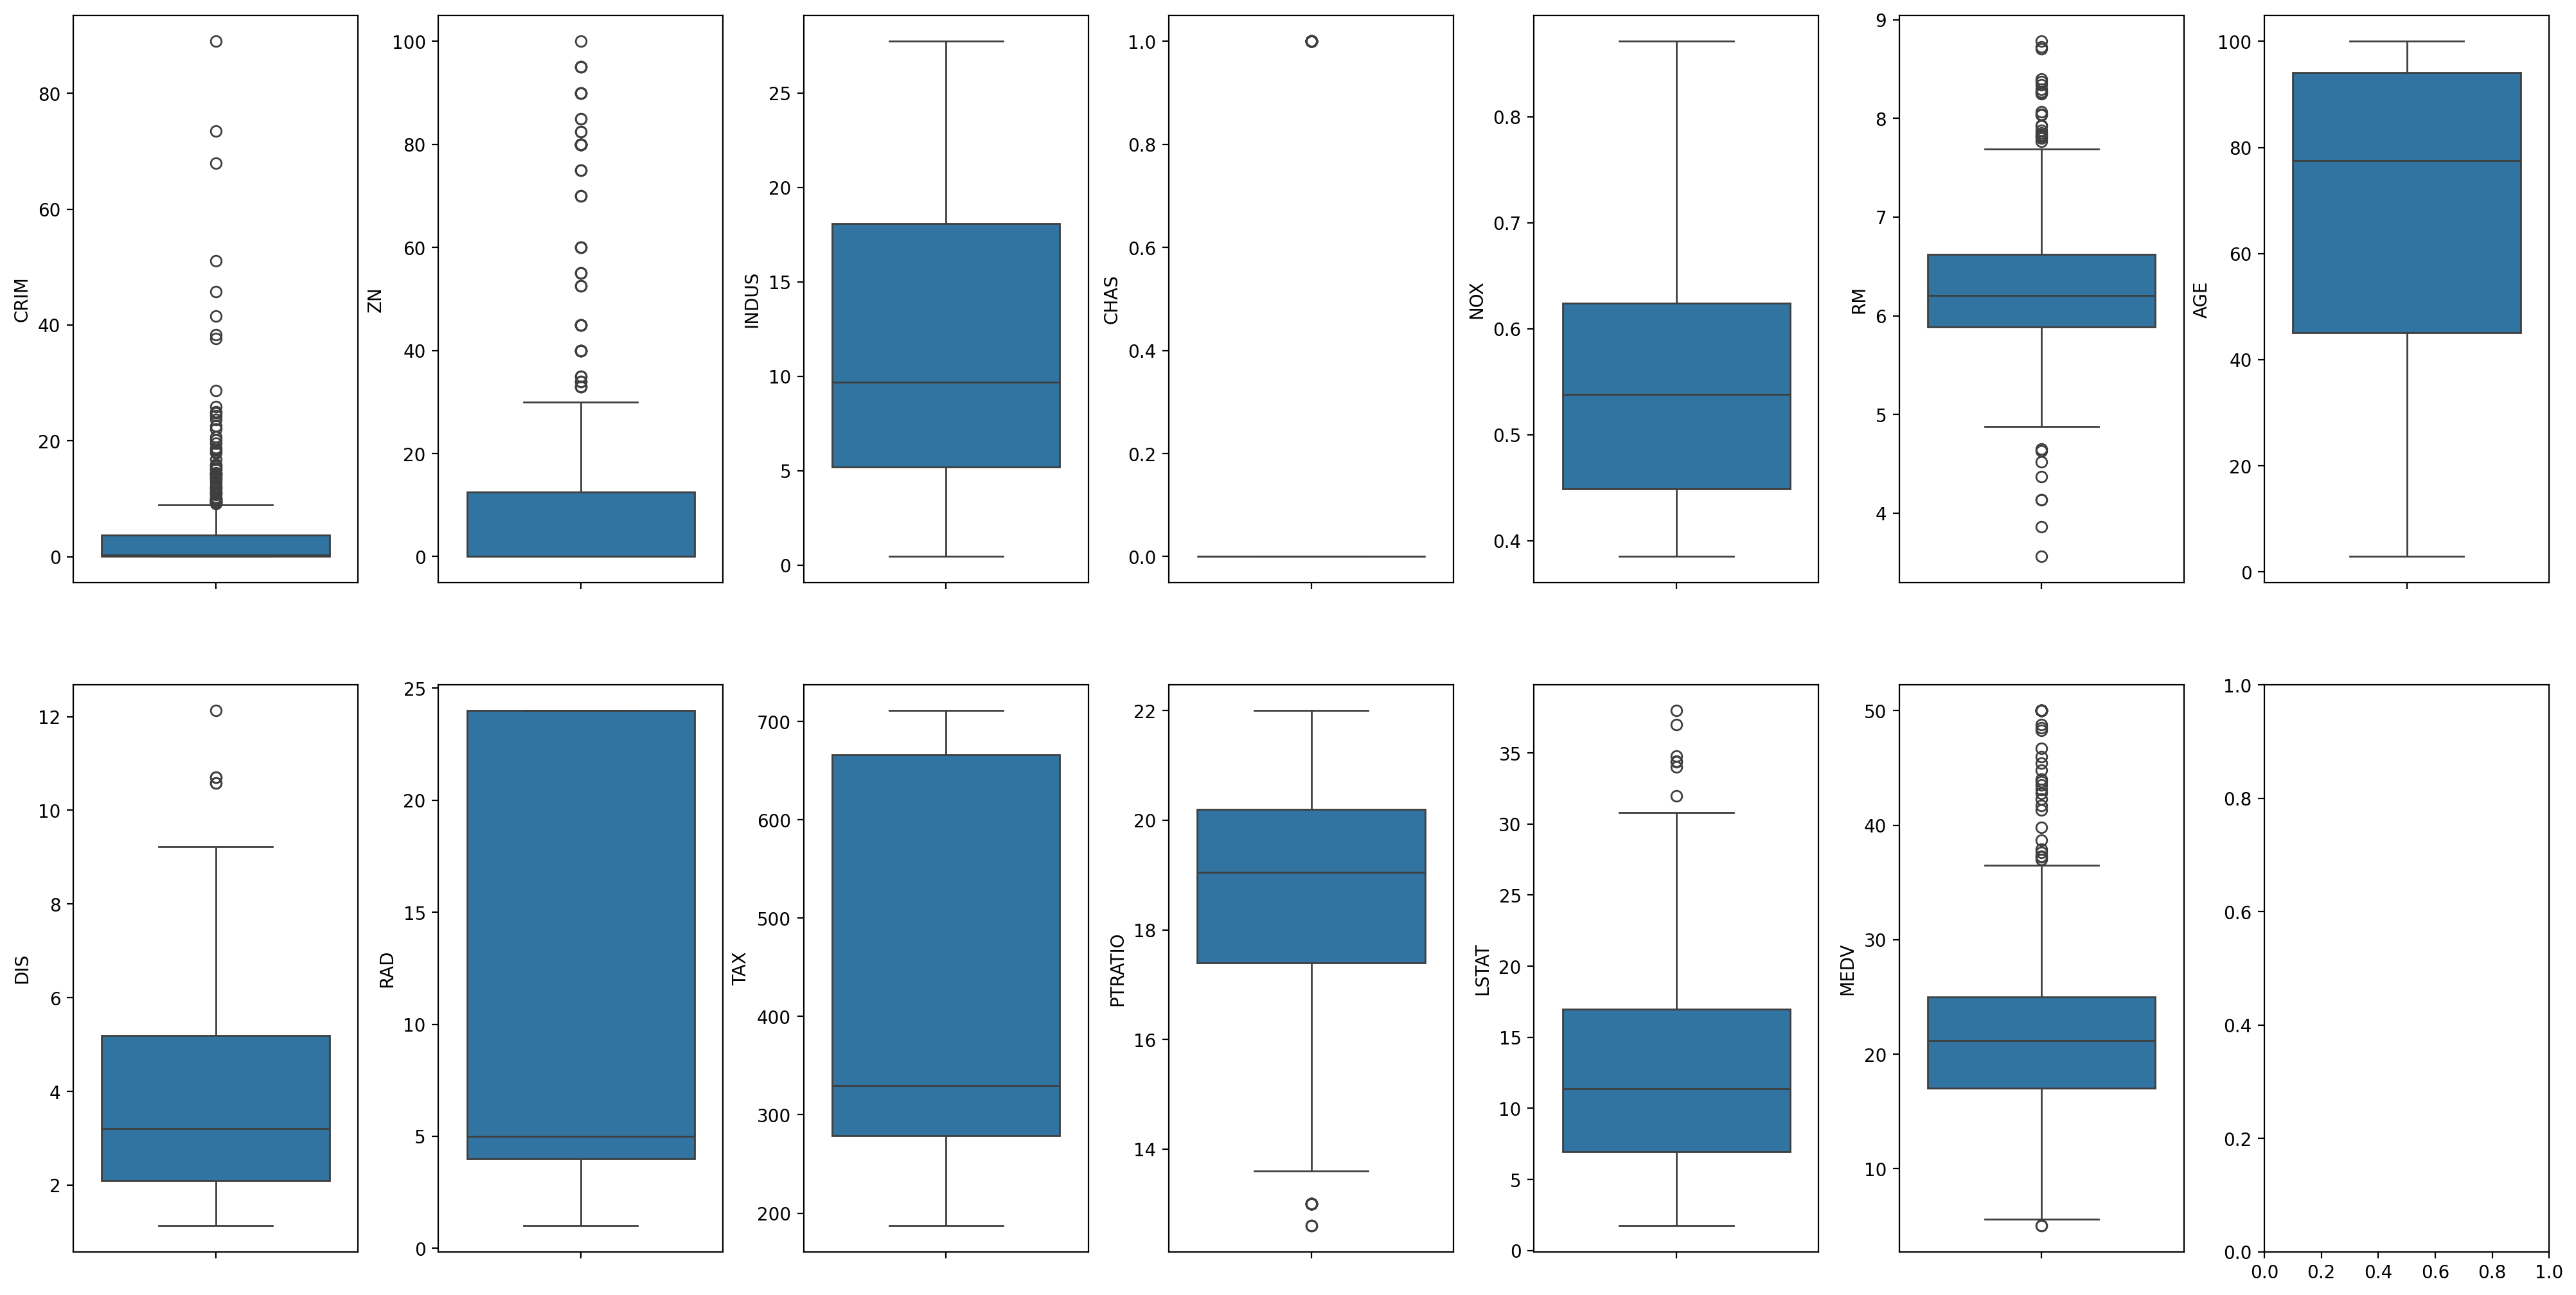

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


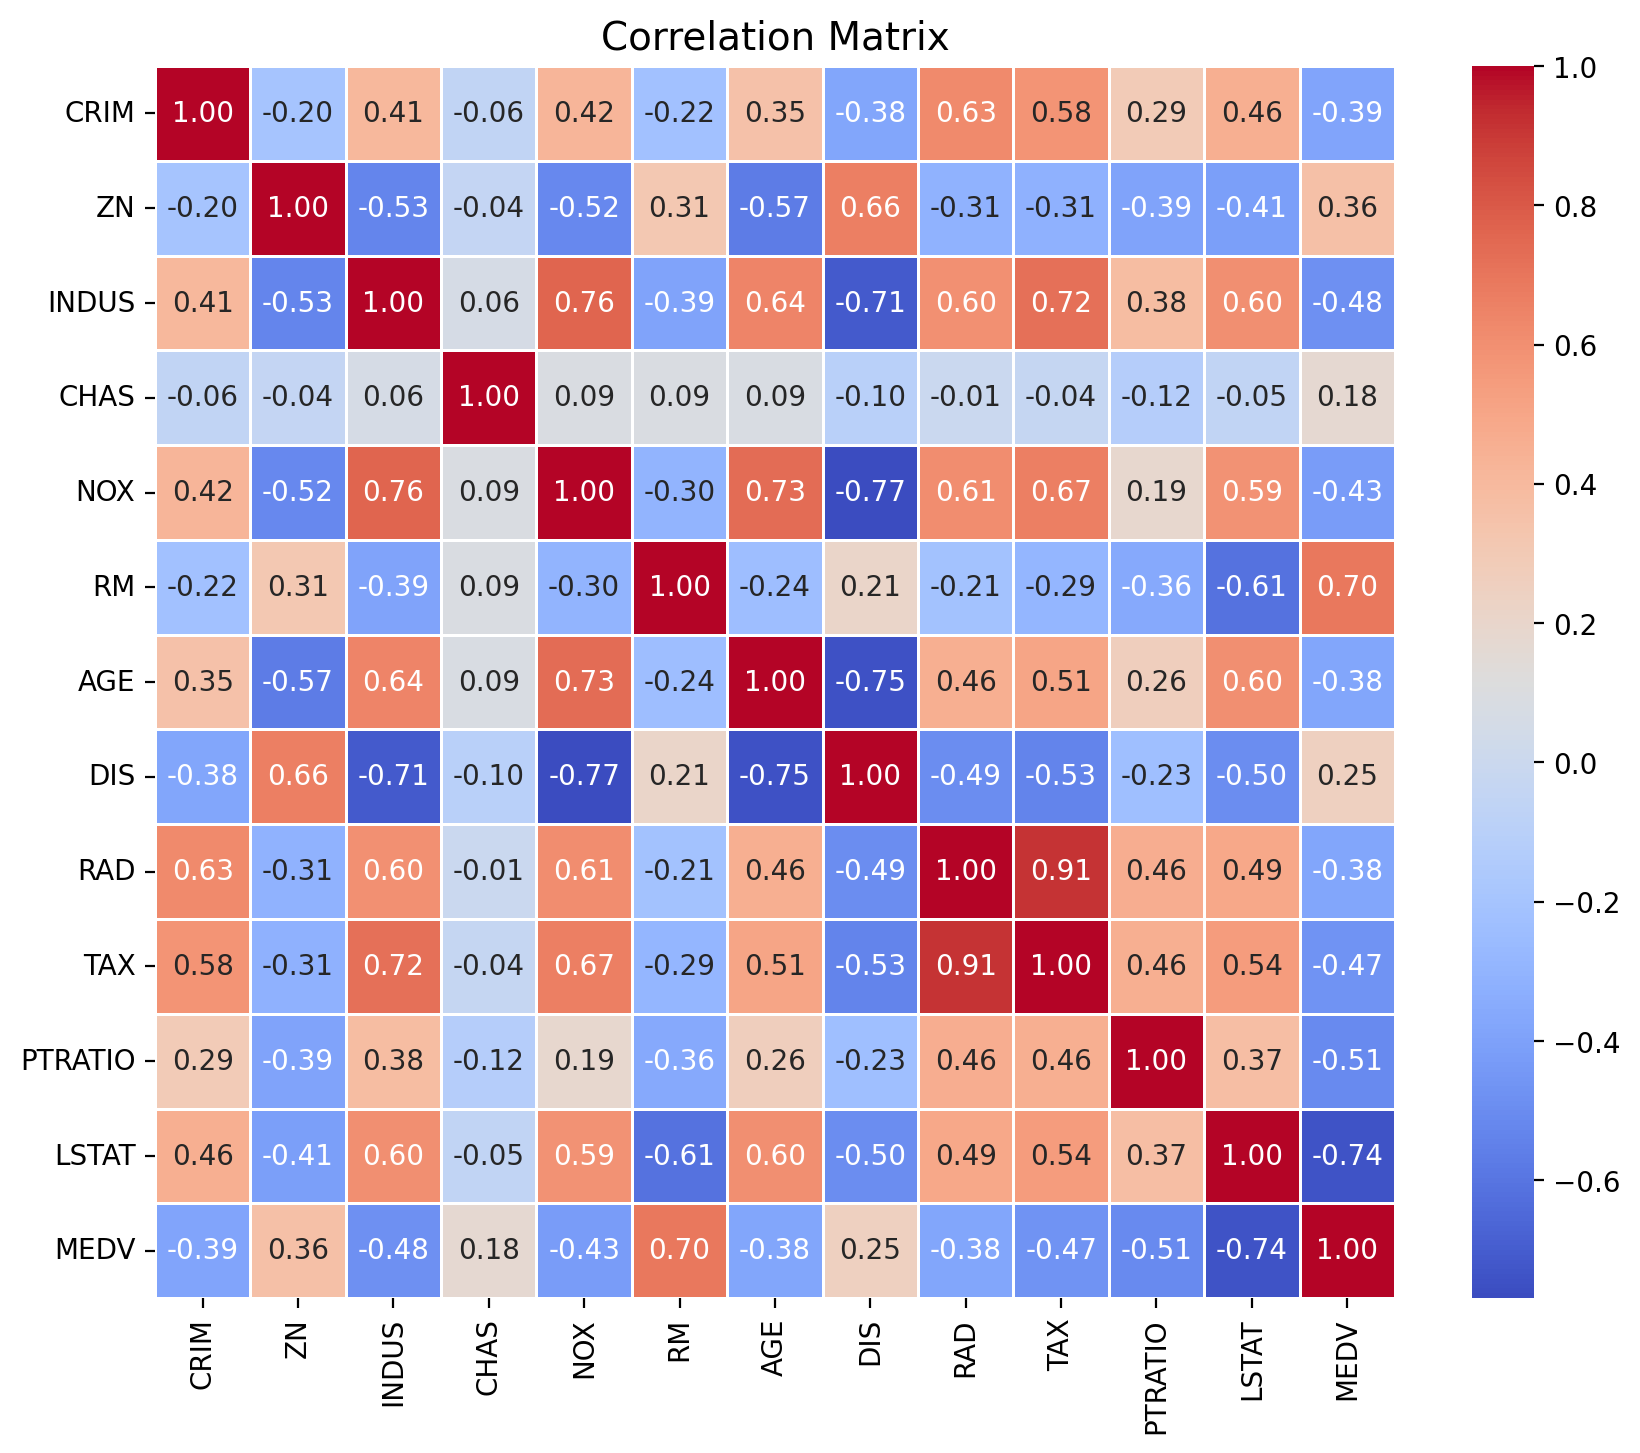

In [5]:
# Import the seaborn library
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data.corr()

# Display correlation matrix
# print(corr_matrix)

# Set figure size for better readability
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Correlation Matrix", fontsize=14)

# Show the plot
plt.show()

In [6]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(123)

# Define X and y
X = data.drop('MEDV', axis=1)  # Features (all columns except 'MEDV')
y = data['MEDV']  # Target variable

# Split the dataset into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=406, random_state=123)

# Check the shapes of the train and validation sets
print(x_train.shape)
print(x_valid.shape)

(406, 12)
(100, 12)


In [7]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

# Initialize and fit Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust alpha (regularization strength)
ridge.fit(x_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(x_valid_scaled)

# Print coefficients

print("Ridge Coefficients:", ridge.coef_)


Ridge Coefficients: [-0.88989972  1.06790564  0.40514777  0.34281763 -1.86503067  2.95988328
  0.0530475  -2.91035344  2.21731322 -2.08309186 -1.91074908 -4.04766696]


In [40]:
import pandas as pd

# Create a DataFrame for better visualization
ridge_results = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
})

# Filter only selected features (nonzero coefficients)
ridge_results = ridge_results[ridge_results["Coefficient"] != 0]

# Print the table
print("Intercept:", ridge.intercept_)
print(ridge_results)

Intercept: 22.35467980295567
    Feature  Coefficient
0      CRIM    -0.889900
1        ZN     1.067906
2     INDUS     0.405148
3      CHAS     0.342818
4       NOX    -1.865031
5        RM     2.959883
6       AGE     0.053047
7       DIS    -2.910353
8       RAD     2.217313
9       TAX    -2.083092
10  PTRATIO    -1.910749
11    LSTAT    -4.047667


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute MSE for Ridge Prediction:
mse_valid_ridge = mean_squared_error(y_valid, y_pred_ridge)

# Print results
print(f"Validation MSE: {mse_valid_ridge:.4f}")




# Compute R^2 score for Ridge Regression:
r2_valid_ridge = r2_score(y_valid, y_pred_ridge)

# Print R^2
print(f"Validation R^2: {r2_valid_ridge:.4f}")


# Number of samples (n) and predictors (p)
n = len(y_valid)  # Number of observations
p = x_train.shape[1]  # Number of predictors (features)

# Compute Adjusted R^2
adjusted_r2 = 1 - (1 - r2_valid_ridge) * ((n - 1) / (n - p - 1))

# Print Adjusted R^2
print(f"Validation Adjusted R^2: {adjusted_r2:.4f}")



Validation MSE: 29.9857
Validation R^2: 0.6426
Validation Adjusted R^2: 0.5933


In [38]:
# Compute RSS (Residual Sum of Squares)
# Predictions on the training set (scaled)
y_pred_ridge1 = ridge.predict(x_train_scaled)
rss1 = np.sum((y_train - y_pred_ridge1) ** 2)
print('RSS is ', rss1)

# Compute Log-Likelihood (assuming Gaussian errors)
n1 = len(y_train)
sigma_squared1 = rss1 / n1
log_likelihood1 = -0.5 * n1 * np.log(2 * np.pi * sigma_squared1) - (rss1 / (2 * sigma_squared1))

# Count nonzero coefficients (number of selected features)
k1 = np.sum(ridge.coef_ != 0)

# Compute AIC and BIC
AIC_r = 2 * k1 - 2 * log_likelihood1
BIC_r = k1 * np.log(n1) - 2 * log_likelihood1


print("AIC:", AIC_r)
print("BIC:", BIC_r)


RSS is  8490.900151131207
AIC: 2410.579327376561
BIC: 2458.655565291782


In [11]:
from sklearn.linear_model import Lasso

# Initialize and fit Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha to control sparsity
lasso.fit(x_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso.predict(x_valid_scaled)

# Print selected features (nonzero coefficients)
selected_features = x_train.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)
print("Lasso Coefficients:", lasso.coef_)


Selected Features: Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')
Lasso Coefficients: [-0.6233607   0.73308148 -0.          0.30293691 -1.2895179   3.0998972
 -0.         -2.36285938  0.86959955 -0.87212804 -1.75438356 -3.99634943]


In [41]:
import pandas as pd

# Create a DataFrame for better visualization
lasso_results = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lasso.coef_
})

# Filter only selected features (nonzero coefficients)
lasso_results = lasso_results[lasso_results["Coefficient"] != 0]

print("Intercept:", lasso.intercept_)
# Print the table
print(lasso_results)


Intercept: 22.35467980295567
    Feature  Coefficient
0      CRIM    -0.623361
1        ZN     0.733081
3      CHAS     0.302937
4       NOX    -1.289518
5        RM     3.099897
7       DIS    -2.362859
8       RAD     0.869600
9       TAX    -0.872128
10  PTRATIO    -1.754384
11    LSTAT    -3.996349


In [42]:
# Compute RSS (Residual Sum of Squares)
# Predictions on the training set (scaled)
y_pred_lasso1 = lasso.predict(x_train_scaled)
rss = np.sum((y_train - y_pred_lasso1) ** 2)

# Compute Log-Likelihood (assuming Gaussian errors)
n = len(y_train)
sigma_squared = rss / n
log_likelihood = -0.5 * n * np.log(2 * np.pi * sigma_squared) - (rss / (2 * sigma_squared))

# Count nonzero coefficients (number of selected features)
k = np.sum(lasso.coef_ != 0)

# Compute AIC and BIC
AIC = 2 * k - 2 * log_likelihood
BIC = k * np.log(n) - 2 * log_likelihood

# Print Results
print("Selected Features:", X.columns[lasso.coef_ != 0].tolist())
print("Lasso Coefficients:", lasso.coef_)
print("AIC:", AIC)
print("BIC:", BIC)



Selected Features: ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Lasso Coefficients: [-0.6233607   0.73308148 -0.          0.30293691 -1.2895179   3.0998972
 -0.         -2.36285938  0.86959955 -0.87212804 -1.75438356 -3.99634943]
AIC: 2415.2518325097117
BIC: 2455.315364105729


**NOTE**

**Lower AIC and lower BIC, mean model performing better**

In [14]:
from sklearn.metrics import mean_squared_error

# Compute MSE for Lasso Prediction:
mse_valid_lasso = mean_squared_error(y_valid, y_pred_lasso)

# Print results
print(f"Validation MSE: {mse_valid_lasso:.4f}")
# -------------------------------------------------------
# Compute R^2 score for Lasso Regression:
r2_valid_lasso = r2_score(y_valid, y_pred_lasso)

# Print R^2
print(f"Validation R^2: {r2_valid_lasso:.4f}")

# -------------------------------------------------------
# Number of samples (n) and predictors (p)
n = len(y_valid)  # Number of observations
p = x_train.shape[1]  # Number of predictors (features)

# Compute Adjusted R^2
adjusted_r2_lasso = 1 - (1 - r2_valid_lasso) * ((n - 1) / (n - p - 1))

# Print Adjusted R^2
print(f"Validation Adjusted R^2: {adjusted_r2_lasso:.4f}")



Validation MSE: 31.1887
Validation R^2: 0.6282
Validation Adjusted R^2: 0.5770


**Prior Distribution**



<ipython-input-15-f6584364f052>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "0.5" (-> color=(0.5, 0.5, 0.5, 1.0)). The keyword argument will take precedence.
  plot(x, y_avg, '0.5', lw=0.5, color = 'blue')


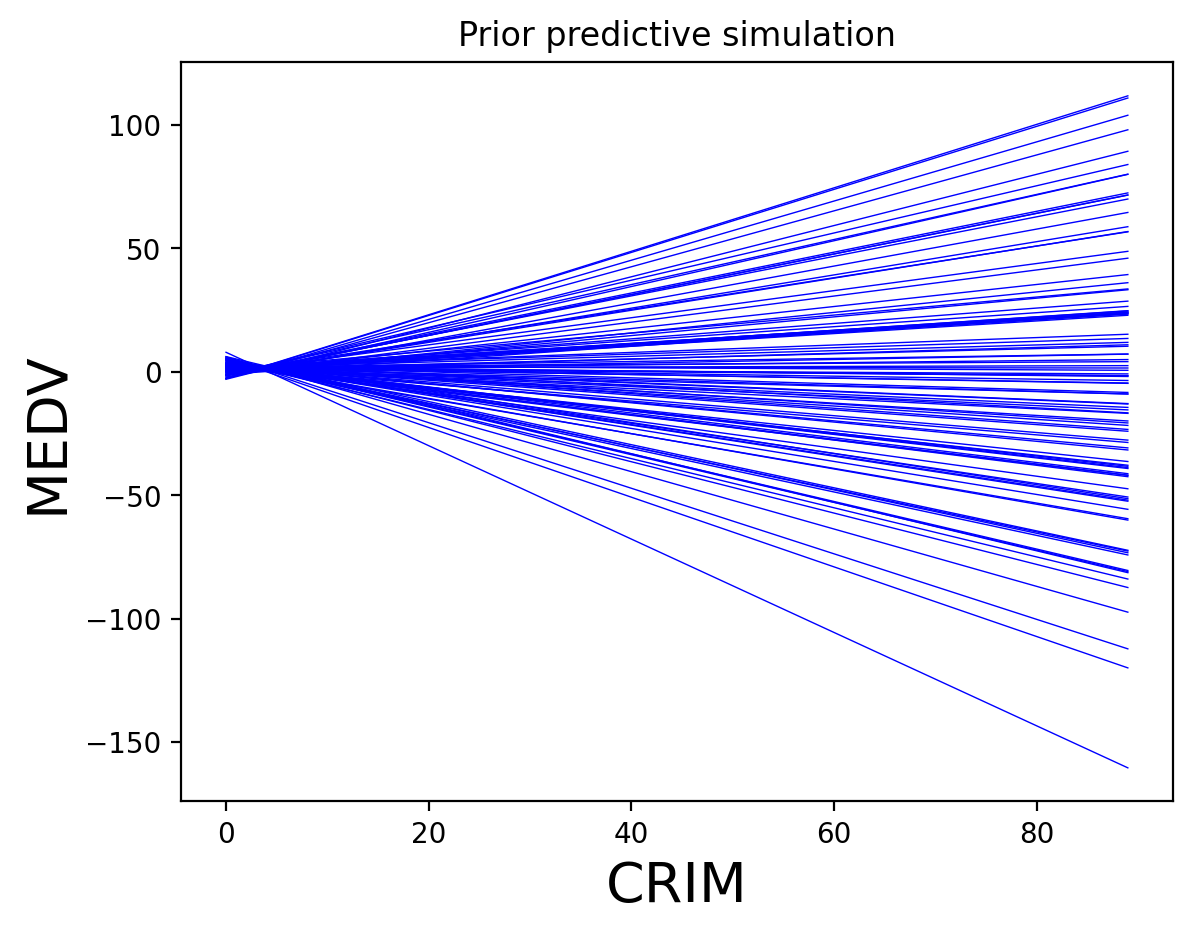

In [15]:
n_samples = 100  # 100 lines
alpha = stats.norm.rvs(1.5, 0.5, n_samples)
beta1 = stats.norm.rvs(0, 0.5, n_samples)

xmin = (x_train['CRIM'].min())
xmax = (x_train['CRIM'].max())
xmean = (x_train['CRIM'].mean())
x = linspace(xmin, xmax, 5) ## Crime range

y_avg = alpha[None, :] + beta1[None, :]*(x[:, None] - xmean) ## we are using broadcasting here

plot(x, y_avg, '0.5', lw=0.5, color = 'blue')
#ylim(-5, 300)
title('Prior predictive simulation')
xlabel('CRIM', fontsize=20)
ylabel('MEDV', fontsize=20);

**MCMC**

Using MCMC to predict the MEDV.

In [44]:
with pm.Model() as model1:
    sigma = pm.Exponential('sigma', 1)
    beta1 = pm.Normal('beta1', mu=-0.5, sigma=1)
    beta2 = pm.Normal('beta2', mu=1, sigma=1)
    beta3 = pm.Normal('beta3', mu=0.4, sigma=1)
    beta4 = pm.Normal('beta4', mu=0.3, sigma=1)
    beta5 = pm.Normal('beta5', mu=-2, sigma=1)
    beta6 = pm.Normal('beta6', mu=3.05, sigma=1)
    beta7 = pm.Normal('beta7', mu=-0.05, sigma=1)
    beta8 = pm.Normal('beta8', mu=-3, sigma=1)
    beta9 = pm.Normal('beta9', mu=2.5, sigma=1)
    beta10 = pm.Normal('beta10', mu=-2, sigma=1)
    beta11 = pm.Normal('beta11', mu=-2, sigma=1)
    beta12 = pm.Normal('beta12', mu=-4, sigma=1)

    alpha = pm.Normal('alpha', mu=22, sigma=1)

    _mu = (alpha + beta1*x_train['CRIM'] + beta2*x_train['ZN']+beta3*x_train['INDUS']+beta4*x_train['CHAS']+beta5*x_train['NOX']+beta6*x_train['RM']+beta7*x_train['AGE']+beta8*x_train['DIS']+beta9*x_train['RAD']+beta10*x_train['TAX']+beta11*x_train['PTRATIO']+beta12*x_train['LSTAT'])
    mu = pm.Deterministic('mu', _mu) ## we use this so that we can sample the posterior predictive later

    # Likelihood function
    y_new = pm.Normal('MEDV', mu=mu, sigma=sigma, observed=y_train)
    # (draws=1000, tune=1000, chains=4, return_inferencedata=True)
    _model1_samples = pm.sample(2000, tune=2000, chains=4, return_inferencedata=True)
model1_mcmc_samples = _model1_samples.posterior.to_dataframe()

Output()

In [21]:
varnames = ['beta1', 'beta2', 'beta3', 'beta4','beta5', 'beta6', 'beta7', 'beta8', 'beta9', 'beta10','beta11', 'beta12', 'sigma', 'alpha']
display(pm.summary(_model1_samples))

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    22.420  1.000  20.515   24.271      0.023    0.016    1921.0   
beta1    -0.100  0.037  -0.169   -0.030      0.001    0.001    2053.0   
beta10   -0.013  0.004  -0.021   -0.006      0.000    0.000    1234.0   
beta11   -0.645  0.109  -0.855   -0.451      0.003    0.002    1159.0   
beta12   -0.584  0.054  -0.679   -0.480      0.001    0.001    1824.0   
...         ...    ...     ...      ...        ...      ...       ...   
mu[402]  19.135  0.544  18.154   20.126      0.012    0.008    2205.0   
mu[403]  23.052  0.445  22.210   23.867      0.010    0.007    2031.0   
mu[404]  12.063  0.532  11.114   13.085      0.011    0.008    2201.0   
mu[405]  13.113  1.185  10.854   15.330      0.031    0.022    1472.0   
sigma     4.688  0.171   4.360    4.997      0.004    0.003    2102.0   

         ess_tail  r_hat  
alpha      1231.0    1.0  
beta1      1544.0    1.0  
beta10      952.0    1.0  
beta11     1101.0    1.0  
beta12     1434.0    1.0  
...           ...    ...  
mu[402]    1610.0    1.0  
mu[403]    1456.0    1.0  
mu[404]    1676.0    1.0  
mu[405]    1480.0    1.0  
sigma      1221.0    1.0  

[420 rows x 9 columns]

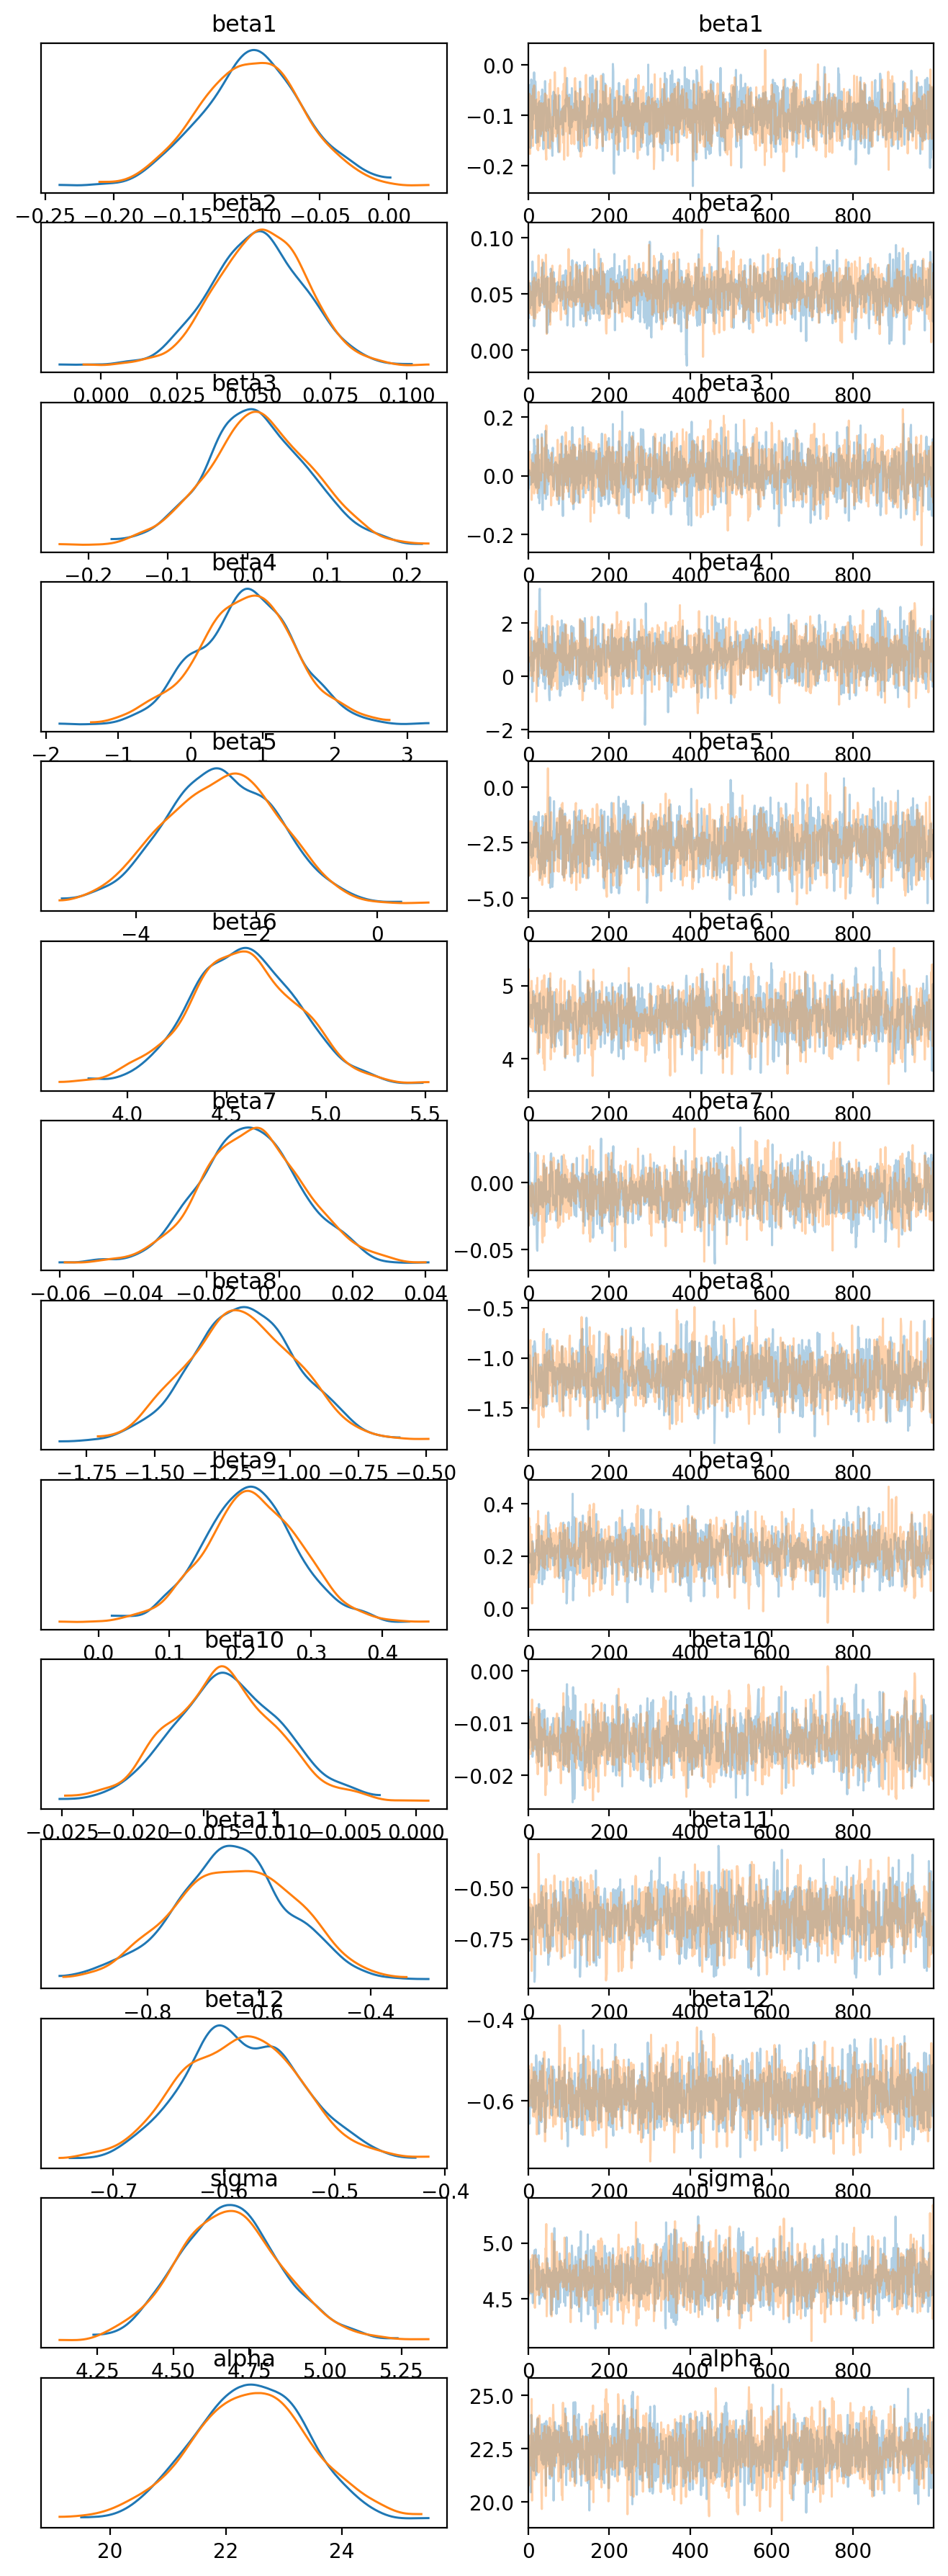

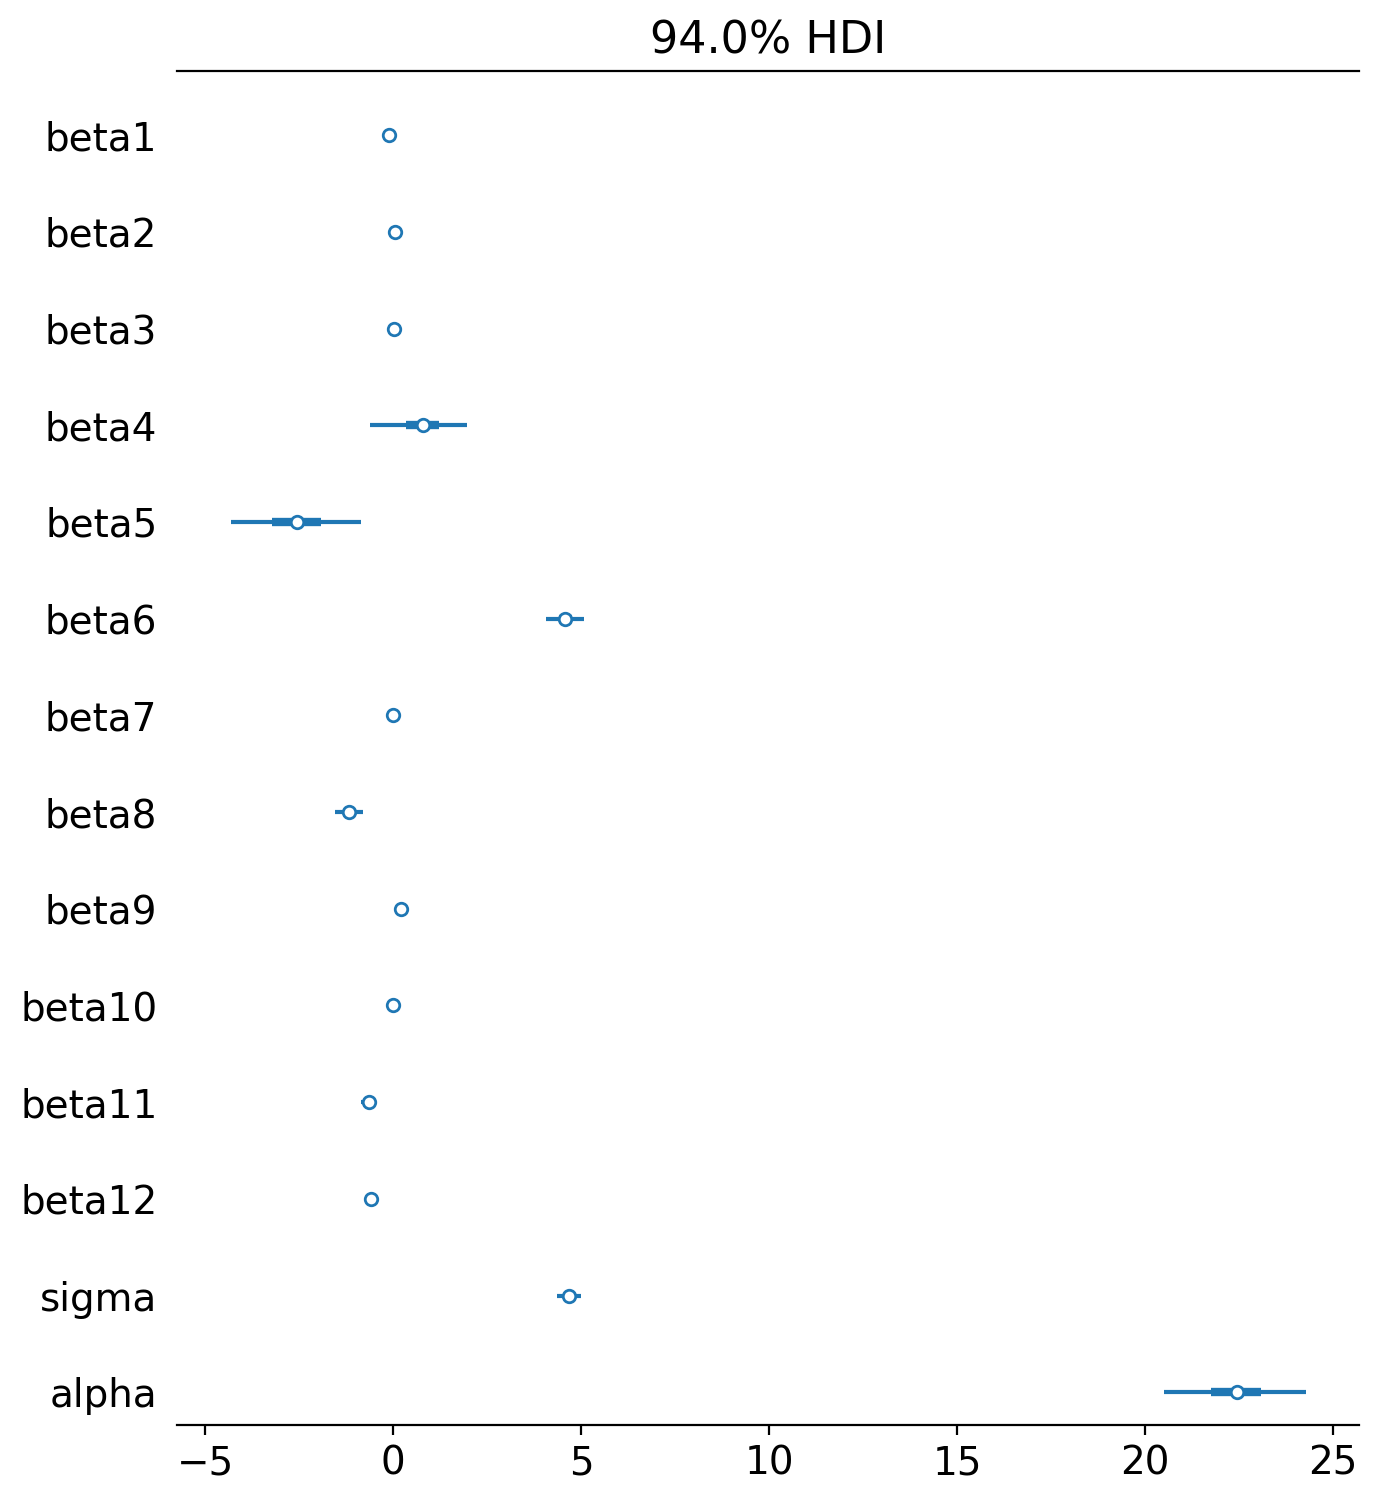

In [22]:
# Set figure size for better readability
figsize = (7, 2 + 0.4 * len(varnames))  # Dynamic height based on variable count

# Trace plot (optional, if needed)
az.plot_trace(_model1_samples, var_names=varnames, compact=False, figsize=(8, 1.6 * len(varnames)))

# Improved Forest Plot
az.plot_forest(
    _model1_samples,
    var_names=varnames,
    combined=True,
    figsize=figsize,
    hdi_prob=0.94,  # Explicitly setting HDI
    ridgeplot_alpha=0.7,  # Slight transparency for better visualization
    markersize=6  # Larger points
)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [32]:
#import pymc as pm
#import numpy as np

# Assume '_model1_samples' is your posterior trace
posterior_samples = az.extract(_model1_samples)  # Extract samples

# Get posterior means for coefficients
# Instead of 'beta', access individual betas:
beta1_samples = posterior_samples["beta1"]
beta2_samples = posterior_samples["beta2"]
beta3_samples = posterior_samples["beta3"]
beta4_samples = posterior_samples["beta4"]
beta5_samples = posterior_samples["beta5"]
beta6_samples = posterior_samples["beta6"]
beta7_samples = posterior_samples["beta7"]
beta8_samples = posterior_samples["beta8"]
beta9_samples = posterior_samples["beta9"]
beta10_samples = posterior_samples["beta10"]
beta11_samples = posterior_samples["beta11"]
beta12_samples = posterior_samples["beta12"]
alpha_samples = posterior_samples["alpha"]  # Intercept

# Stack beta samples into a single array:
beta_samples = np.stack([beta1_samples, beta2_samples, beta3_samples, beta4_samples,
                         beta5_samples, beta6_samples, beta7_samples, beta8_samples,
                         beta9_samples, beta10_samples, beta11_samples, beta12_samples], axis=-1)

# Predictive function: y = alpha + X * beta
# Convert alpha_samples to a NumPy array and reshape
alpha_samples_np = alpha_samples.values.reshape(-1, 1)

# Reshape x_valid to match expected shape
x_valid_np = x_valid.values

# Calculate predictions for each sample
y_pred_samples = alpha_samples_np + np.dot(beta_samples, x_valid_np.T)

# Compute mean and 94% credible interval
y_pred_mean = y_pred_samples.mean(axis=0)
y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.94)

# Print results
print("Predicted mean:", y_pred_mean)
#print("94% HDI:", y_pred_hdi)

Predicted mean: [17.23993825 27.64091154 38.55551517 17.72541255 30.80053268 38.67272924
 25.73203732 11.86267189 12.85002103 31.77225569 28.16465694 19.99917431
 15.06169147 30.53980423 16.86121189 20.74923872 20.74925096 37.94511164
 17.93237715 14.20728426 15.06761882 23.76964182 33.03050301 38.46853275
 30.51492361 21.62699092 18.70281886 21.08886505 23.50863821 22.89517857
 26.30217889 33.84134134 17.47052968 21.80712523 23.07239238 34.73222619
 28.67291944 18.54066946 14.44309396 38.11127927 30.69237446 18.03251003
 19.27078828 39.36136898  6.42644166 26.56111561 20.34205576 25.66027047
 15.99358305 25.50382946 34.15230371 23.89437233 20.70647832 11.60254087
 23.42775607 18.78495694 11.07259346  1.74872201 32.59909609 12.9394051
 20.6975542  23.55813255 23.75529566 17.99423198 23.74574037 26.37871516
 25.87826119 22.93804756 24.17592623 29.89126228 20.30335084 28.38868018
 16.06237285 24.90481762 20.88634847 16.83968114 17.16669117 15.89892928
 29.23069931 -3.06777088 32.25273548

<ipython-input-32-90ec40dba32e>:40: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.94)


In [33]:
from sklearn.metrics import mean_squared_error

# Calculate the mean of the posterior predictive samples
y_pred_mean = y_pred_samples.mean(axis=0)  # Average across posterior samples

# Compute MSE using the mean prediction
mse_valid_mcmc = mean_squared_error(y_valid, y_pred_mean)

# Print results
print(f"Validation MSE: {mse_valid_mcmc:.4f}")

Validation MSE: 32.7134


In [34]:
import numpy as np
import scipy.stats as stats

# Define standard deviation (sigma) - this should be from your model
sigma = np.std(y_valid - y_pred_lasso)  # Estimate if unknown

# Compute log-likelihood for each data point
log_likelihood_manual = stats.norm.logpdf(y_valid, loc=y_pred_lasso, scale=sigma)

# Sum log-likelihood across all data points
total_log_likelihood = np.sum(log_likelihood_manual)

print(f"Log-Likelihood: {total_log_likelihood:.4f}")


Log-Likelihood: -313.8967


In [35]:
# Number of estimated parameters (excluding auxiliary parameters like sigma)
k = x_train.shape[1]  # Number of predictors

# Number of observations
n = len(y_train)

# Compute AIC and BIC using manually computed log-likelihood
AIC = 2 * k - 2 * total_log_likelihood
BIC = k * np.log(n) - 2 * total_log_likelihood

# Print results
print("AIC:", AIC)
print("BIC:", BIC)

AIC: 651.7934473936966
BIC: 699.8696853089174


In [36]:
# - Calculating y_pred_mean for tran data

# Extract posterior samples from the model
posterior_samples = az.extract(_model1_samples)  # Extract samples

# Get posterior means for coefficients
# Updated list comprehension to include all 12 beta coefficients:
beta_samples = np.stack([posterior_samples[f"beta{i}"] for i in range(1, 13)], axis=-1)  # Stack all betas
alpha_samples = posterior_samples["alpha"]  # Intercept

# Convert alpha_samples to a NumPy array and reshape
alpha_samples_np = alpha_samples.values.reshape(-1, 1)

# Reshape x_train to match expected shape
x_train_np = x_train.values  # Convert to numpy array, if not already

# Calculate predictions for each sample
y_pred_samples = alpha_samples_np + np.dot(beta_samples, x_train_np.T)  # Predictions for training data

# Compute mean and 94% credible interval
y_pred_mean = y_pred_samples.mean(axis=0)  # Mean predictions
y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.94)  # 94% HDI (Highest Density Interval)

# Print results
# print("Predicted mean for y_train:", y_pred_mean)
# print("94% HDI:", y_pred_hdi)

<ipython-input-36-5ab79d41dead>:22: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  y_pred_hdi = az.hdi(y_pred_samples, hdi_prob=0.94)  # 94% HDI (Highest Density Interval)


In [43]:
import numpy as np

# Compute Total Sum of Squares (TSS)
y_mean = np.mean(y_train)
tss = np.sum((y_train - y_mean) ** 2)

# Compute Residual Sum of Squares (RSS)
rss = np.sum((y_train - y_pred_mean) ** 2)

# Compute Bayesian R²
r2_bayesian = 1 - (rss / tss)

# Calculate number of observations (n) and number of predictors (k)
n = len(y_train)  # Number of data points in the training set
k = x_train.shape[1]  # Number of predictors (features)

# Calculate Adjusted R²
r2_adj = 1 - ((1 - r2_bayesian) * (n - 1) / (n - k - 1))

# Print results
print(f"Bayesian R²: {r2_bayesian:.4f}")
print(f"Adjusted R²: {r2_adj:.4f}")


Bayesian R²: 0.7447
Adjusted R²: 0.7369


$Result \text{ } Comparison$
\begin{array}{|c|c|c|c|}
\hline
 & \textbf{Ridge Regression} & \textbf{Lasso Regression} & \textbf{MCMC Method} \\
\hline
MSE & 29.9857 & 31.1887 & 32.7134 \\
R^{2} & 0.6426 & 0.6282 & 0.7447 \\
\text{Adjusted } R^{2} & 0.5770 & 0.5891 & 0.7369 \\
AIC & 2406.32 & 2415.25 & 651.79 \\
BIC & 2458.40 & 2455.32 & 699.87 \\
\hline
\end{array}
$$


Tasks:

1. Plot: Prior and posterior distribution of prediction. (**half done**)

2. AIC, abnd BIC: (**Done**)

3. Create a table of beta coefficients - Ridge, Lasso, MCMC (**Done**)


$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{Feature} & \textbf{Ridge Regression} & \textbf{Lasso Regression} & \textbf{MCMC Method} \\
\hline
Intercept & 22.3547 & 22.3457 & 22.42 \\
CRIM & -0.8899 & -0.6233 & -0.1 \\
ZN & 1.0679 & 0.7331 & 0.052 \\
INDUS & 0.4051 &  & 0.013 \\
CHAS & 0.3428 & 0.3029 & 0.77 \\
NOX & -1.8650 & -1.2895 & -2.577 \\
RM & 2.9599 & 3.0999 & 4.582 \\
AGE & 0.0530 &  & -0.008 \\
DIS & -2.9104 & -2.3629 & -1.17 \\
RAD & 2.2173 & 0.8696 & 0.215 \\
TAX & -2.0831 & -0.8721 & -0.013 \\
PTRATIO & -1.9107 & -1.7543 & -0.645 \\
LSTAT & -4.0477 & -3.9963 & -0.584 \\
\hline
\end{array}
$$
